In [2]:
# so will label user as poly and mono based on the tweets
# will further classify poly into 
    # talk about drug after their first mention of juul
    # talk d before their mention of juul

In [3]:
import pandas as pd
import numpy as np
import tweepy
from matplotlib import pyplot as plt
from tqdm import tqdm
import pickle

In [10]:
pd.set_option('display.max_colwidth', -1)

In [8]:
# need to change with 3200 limit data
df_timeline = pd.read_csv("/home/akshayuppal3/userTimelineData.csv", lineterminator="\n")

In [13]:
a =  df_timeline.groupby("userID")['tweetText'].agg("count")

In [14]:
users = list(a.index)

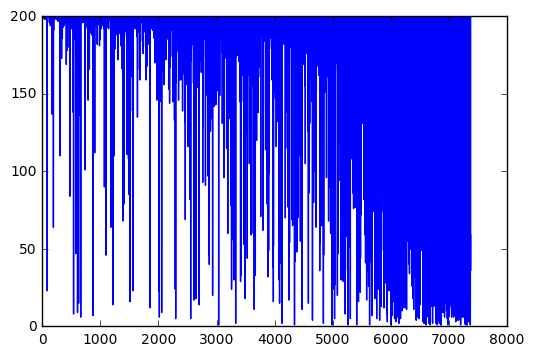

In [56]:
plt.plot(np.arange(0,len(a)),a.values)
plt.show()

In [90]:
df_user1 = df_timeline[df_timeline.userID == users[0]]


In [111]:
weed_words.remove('gage')

In [105]:
weed_words.remove('skunk')

# need watson classifier for categorical classification

In [187]:
# next user watson to classify text into categories
df_user1.loc[df_user1.tweetText.str.contains(pattern)]

,favourites_count,friendList,friendsCount,hashtags,imageurl,lang,retweetCount,retweeted,tweetCreatedAt,tweetId,tweetText,userCreatedAt,userDescription,userFollowersCount,userID,userLocation,userName


In [168]:
poly_user = list()
for user in tqdm(users):
    df_temp = df_timeline[df_timeline.userID == user]
    if(len(df_temp.loc[df_temp.tweetText.str.contains(pattern)]) > 0):
        poly_user.append(user)

100%|██████████| 7372/7372 [00:24<00:00, 302.43it/s]


In [183]:
ex = df_timeline.loc[df_timeline.userID == poly_user[1]]
ex.loc[ex.tweetText.str.contains(pattern)]

,favourites_count,friendList,friendsCount,hashtags,imageurl,lang,retweetCount,retweeted,tweetCreatedAt,tweetId,tweetText,userCreatedAt,userDescription,userFollowersCount,userID,userLocation,userName
682072,287,None,381,"['NNY', 'FireSafety']",http://pbs.twimg.com/profile_images/2927758565/ea75549c1d2bc4d87577f7bf60f6a475_normal.jpeg,en,0,False,2018-10-09 14:00:02,1049660765689602048,Free smoke detectors available through @RedCross program #NNY #FireSafety https://t.co/swfUl2294z https://t.co/KhWFFAGyBf,2009-01-07 16:30:50,"The Watertown Daily Times brings you the most comprehensive coverage of N.Y.'s Jefferson, Lewis & St. Lawrence counties - and exclusive giveaways!",7085,18727106,"Watertown, NY",Watertown DailyTimes


In [184]:
# so will create embeddings for our tweets and manually label 500 of the tweet containing weeds and classify them 
# them as substance abouse or not

In [73]:
len(df_timeline.tweetText)

1344182

In [74]:
## loading the weed words or other form of drugs (top 30 mentioned at https://www.powerthesaurus.org/weed/synonyms)
weed_words = pd.read_excel("/home/akshayuppal3/Weed_words.xlsx",header=None)
weed_words.columns = ['weedID']
weed_words = list(weed_words.weedID)
weed_words.remove('gage')
weed_words.remove('skunk')
# weed_words.remove('grass')
# weed_words.remove('pot')
weed_words.remove("dope")
# weed_words.remove("joint")
# weed_words.remove("herb")
# weed_words.remove("bud")
weed_words = [(" " + word+" ") for word in weed_words]
pattern = "|".join(weed_words)

In [108]:
pattern

' weed | ganja | marijuana | grass | cannabis | pot | smoke | mary jane | hemp | marihuana | hash | reefer | hashish | herb | bhang | green goddess | locoweed | maryjane | bud | spliff | wacky baccy | joint | sinsemilla | doobie | tobacco | acapulco gold '

In [80]:
import gensim
import nltk
import pandas as pd
import numpy as np
import tweepy
from matplotlib import pyplot as plt
from tqdm import tqdm

In [93]:
nltk.download('punkt')
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package punkt to
[nltk_data]     /home/akshayuppal3/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/akshayuppal3/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### tokenize the sentences for the gensim.. we are going to classify the  sentences as weeds or not.. manual label(500 sent)

In [81]:
tkz = nltk.tokenize

In [135]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot

In [332]:
# keeping only english tweets
df_timeline = (df_timeline[df_timeline.lang == 'en'])

In [333]:
# filter those that contain the occurance of weed or similar words
df_tweet_weeds = df_timeline[df_timeline['tweetText'].str.contains(pattern, case = False)]

In [334]:
df_nonweed = (df_timeline.loc[~df_timeline.index.isin(df_tweet_weeds.index)])

In [363]:
# taking sample of 1000 and 1000
df_nonweed =(df_nonweed.sample(frac=1))
nonweed_sample = df_nonweed[:len(df_tweet_weeds)]

In [364]:
# randomize the data before creating embedding 
df_tweet_weeds =(df_tweet_weeds.sample(frac=1))

In [365]:
weed_sample = (df_tweet_weeds)

In [439]:
mix_sample = weed_sample.append(nonweed_sample)

In [440]:
len(mix_sample)

48622

In [441]:
mix_sample = mix_sample[['tweetText']]

In [442]:
mix_sample = pd.DataFrame(mix_sample['tweetText'].str.replace(r'(https?://\S+)',""))
mix_sample = pd.DataFrame(mix_sample['tweetText'].str.replace(r'(\@\w+)',"author")) 
mix_sample = pd.DataFrame(mix_sample['tweetText'].str.replace(r'(\#\w+)',""))

In [443]:
mix_sample

,tweetText
1128629,"Miami we open till Midnight tonight, don't forget to pull up and check out all our smoke essentials!!"
1296394,"According to ""deeming"" regulations the images below depict manufacturing from 3 ""other tobacco products"" ENDS the"
322304,New episode dropping shortly...New coming this week! in the meantime listen to: ‘Baked Mistake 01: Men Driving High with 20lb of Weed Call Police on Themselves’ on
709212,Said colt 45 and two zigzags baby that’s all we need we can go to the park after dark smoke that tumbleweed as the marijuana burn we can take our turn singing them dirty rap songs stop and hit the bong like cheech and chong and sell tapes from here to hong kong
1327854,Check out this photo of Whelans Smoke Shop on
1280008,"""..the conversation about the effects of marijuana on teens has gotten a lot more complicated."" Learn More:"
1026294,Who do you think tobacco companies are targeting?
1313753,sorry i can't hang tonight i need to smoke the rest of my crack but i'll hit you up at 4:30am
553464,Irregularities found by a Reuters investigation into Philip Morris International’s clinical trial program for its new iQOS smoking device come at a crucial time for the tobacco giant. More: via author
145501,“Increasing the age of sale of tobacco from 18 to 21 will take it out of the high school social setting” author author author author


In [524]:
def get_words_lists(df):
    final_words = list()
    for index,tweet in tqdm(df.iterrows(), total=len(mix_sample)):
        tweet_text = tweet['tweetText']
        words = tkz.word_tokenize(tweet_text)
        words = [ele for ele in words if ((ele not in stopwords) and len(ele)>2 and (ele.isalpha()))]
        words = [word.lower() for word in words]
        final_words.append(words)
    return final_words

In [504]:
model = Word2Vec(sentences, size=100,min_count=2)
w2v = dict(zip(model.wv.index2word, model.wv.syn0))

/home/akshayuppal3/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
  from ipykernel import kernelapp as app


In [ ]:
## might as well user glove for word vectors and then take average of the vectors..

In [484]:
# pickle the w2v word vectors 
with open("/home/akshayuppal3/twitter_juul/models/w2v.pkl","wb") as f:
    pickle.dump(w2v,f)

In [485]:
# model.train(sentences, total_examples=len(sentences), epochs=10)

In [486]:
#open the w2v model
w2v = pickle.load(open("/home/akshayuppal3/twitter_juul/models/w2v.pkl","rb"))

In [488]:
w = 'weed'
model.wv.most_similar(positive=w)

/home/akshayuppal3/anaconda3/lib/python3.5/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('aww', 0.928421676158905),
 ('neighbor', 0.9098877906799316),
 ('ween', 0.9070401191711426),
 ('poppyseeds', 0.903370201587677),
 ('rewind', 0.9028664231300354),
 ('bagel', 0.9005237817764282),
 ('boss', 0.8994361162185669),
 ('sooo', 0.8988165855407715),
 ('amphetamines', 0.8923727869987488),
 ('ass', 0.8917268514633179)]

In [489]:
model.wv.similarity(w1='pot',w2='cannabis')

/home/akshayuppal3/anaconda3/lib/python3.5/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.8512572

In [503]:
w2v = dict(zip(model.wv.index2word, model.wv.syn0))

/home/akshayuppal3/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
  if __name__ == '__main__':


In [492]:
model.wv.similarity(w1='weed',w2='high')

/home/akshayuppal3/anaconda3/lib/python3.5/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.5576079

In [461]:
# so now to classify the text as substance abuse or not based on the tags..annotated
# so now will annotate the 500 sentences containing of weed words.. 
# going to label promotions and news as non weed
# labels (drug: 1, non_drug:-1)
to_annotate = mix_sample[:500]

In [4]:
df_weed_ann = pd.read_csv("/home/akshayuppal3/weed_dataset1.csv")
df_weed_ann.columns = ['userID',"tweetText","label"]

In [520]:
# class that returns word2vec
class MeanEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        # if a text is empty we should return a vector of zeros
        # with the same dimensionality as all the other vectors
        self.dim = len(next(iter(word2vec.values())))

    def fit(self, X, y):
        return self

    def transform(self, X):
        return np.array([
            np.mean([self.word2vec[w] for w in words if w in self.word2vec]
                    or [np.zeros(self.dim)], axis=0)
            for words in X
        ])

In [522]:
ob = MeanEmbeddingVectorizer(w2v)

In [551]:
# so the function would return teh average of the word vector from w2v 100*500
X = ob.transform(get_words_lists(df_weed_ann))
y = list(df_weed_ann.label)



  0%|          | 0/48622 [00:00<?, ?it/s]

  0%|          | 211/48622 [00:00<00:23, 2102.86it/s]

  1%|          | 419/48622 [00:00<00:23, 2095.30it/s]

  1%|          | 500/48622 [00:00<00:23, 2053.28it/s]

In [552]:
df_weed_ann.columns

Index(['userID', 'tweetText', 'label'], dtype='object')

In [553]:
# lets get the accuracy for using the feature matrix as one returned by word2vec
from sklearn.pipeline import Pipeline
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB

In [569]:
import sklearn

In [554]:
cross_validation(GaussianNB,X,)

TypeError: 'module' object is not callable

In [558]:
cross_validation.

TypeError: 'module' object is not callable

In [1]:
0 % 2

0

In [20]:
with open("dataframe.csv","wb") as f:
    pickle.dump(df_timeline,f)

In [21]:
df_timeline.to_csv("dataframe_test.csv")

In [23]:
# zip squash.zip "dataframe.csv"
! tar -zcvf dataframe.csv.zip "dataframe_test.csv"

dataframe_test.csv
